In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize

In [ ]:
data = pd.read_csv('/content/data_2D.csv')

In [ ]:
data.head()

,Unnamed: 0,index,URL,Date,Tweet,ID,Username,Replies,Reetweets,Likes,Quotes,conversationId,Language,Links,Media,Retweeted Tweet,Bookmarks
0,0,1412,https://twitter.com/oksihen/status/16584282698...,2023-05-16 11:04:46+00:00,@__nsch @bankbsi_id @Bittersweutz kak mendinga...,1658428269849608192,oksihen,1,0,0,0,1655777758180708355,in,NaN,NaN,NaN,0
1,1,23337,https://twitter.com/reixyynx/status/1655911656...,2023-05-09 12:24:38+00:00,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...,1655911656407580672,reixyynx,0,0,0,0,1655781242166710273,in,NaN,NaN,NaN,0
2,2,23099,https://twitter.com/sheyappe/status/1655924302...,2023-05-09 13:14:54+00:00,@SeokjinRie @bankbsi_id dih ternyata transfer ...,1655924302917804033,sheyappe,1,0,0,0,1655909697399177217,in,NaN,NaN,NaN,0
3,3,5691,https://twitter.com/tfouive/status/16575732480...,2023-05-14 02:27:13+00:00,@bankbsi_id kalo ambil duitnya langsung ke ban...,1657573248035586048,tfouive,1,0,0,0,1657346196548239360,in,NaN,NaN,NaN,0
4,4,16823,https://twitter.com/itshaeyoz/status/165648391...,2023-05-11 02:18:35+00:00,@bankbsi_id min ayo dong kasi tau info ke nasa...,1656483914373005312,itshaeyoz,1,0,2,0,1655777758180708355,in,NaN,NaN,NaN,0


In [ ]:
df = data[['Tweet']].copy()
df

,Tweet
0,@__nsch @bankbsi_id @Bittersweutz kak mendinga...
1,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...
2,@SeokjinRie @bankbsi_id dih ternyata transfer ...
3,@bankbsi_id kalo ambil duitnya langsung ke ban...
4,@bankbsi_id min ayo dong kasi tau info ke nasa...
...,...
6096,"@ratnamuninggarr @bankbsi_id ka, setauku juga ..."
6097,@bankbsi_id @fadlysuardhana 3x24 jam keterlalu...
6098,@OposisiCerdas Mau indonesia seperti bank BSI
6099,@bankbsi_id @ngebacot_bae Ga bisa di akses woo...


In [ ]:
def cleansing(df):
    # Convert to lowercase
    df_clean = df.str.lower()

    # Remove digits
    df_clean = [re.sub(r"\d+", "", i) for i in df_clean]

    # Remove mentions (@username)
    df_clean = [re.sub(r'@\w+', '', i) for i in df_clean]

    # Remove non-word characters
    df_clean = [re.sub(r'[^\w]', ' ', i) for i in df_clean]

    # Remove extra whitespaces
    df_clean = [re.sub(r'\s+', ' ', i) for i in df_clean]

    # Remove non-Roman characters using regex
    df_clean = [re.sub(r'[^\x00-\x7F]+', '', i)for i in df_clean]

    return df_clean

In [ ]:
df['Clean_Tweet']=cleansing(df['Tweet'])
df.head()

,Tweet,Clean_Tweet
0,@__nsch @bankbsi_id @Bittersweutz kak mendinga...,kak mendingan hubungi aja call centernya
1,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...,sore ini pun sama
2,@SeokjinRie @bankbsi_id dih ternyata transfer ...,dih ternyata transfer ke bank lain masih belu...
3,@bankbsi_id kalo ambil duitnya langsung ke ban...,kalo ambil duitnya langsung ke bank bisa ga s...
4,@bankbsi_id min ayo dong kasi tau info ke nasa...,min ayo dong kasi tau info ke nasabahnya udh ...


In [ ]:
df['Clean_Tweet'].iloc[1]

' sore ini pun sama '

In [ ]:
df.head()

,Tweet,Clean_Tweet
0,@__nsch @bankbsi_id @Bittersweutz kak mendinga...,kak mendingan hubungi aja call centernya
1,@Adelyaaav @med_faqih08 @bankbsi_id sore ini p...,sore ini pun sama
2,@SeokjinRie @bankbsi_id dih ternyata transfer ...,dih ternyata transfer ke bank lain masih belu...
3,@bankbsi_id kalo ambil duitnya langsung ke ban...,kalo ambil duitnya langsung ke bank bisa ga s...
4,@bankbsi_id min ayo dong kasi tau info ke nasa...,min ayo dong kasi tau info ke nasabahnya udh ...


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test= train_test_split(df['Clean_Tweet'],test_size = 0.2, random_state = 42)

# Training data

In [ ]:
x_train

3921     kalau topup ewallet setauku emang belum bisa ...
2107     hari ke may jam wib bsi bekasi masih error as...
485      kan emang bank kalau transaksi ada otp dan pa...
4154    mau nanya min ibu saya melakukan transaksi mel...
452      sudah bisa sekarang atmnya kak mulai beropera...
                              ...                        
3772     kalau saya baru bulan ini dan ini adalah reke...
5191     ini tadi sudah bisa lagii bener bgt emg kudu ...
5226     itu catatan mutasinya apa bg coba d liatin bi...
5390                    ah yg bener ah sebel bgt loh gua 
860                    mbanking nya masih belum bisa min 
Name: Clean_Tweet, Length: 4880, dtype: object

In [ ]:
# Recheck the data size
print(len(x_train))
print(len(x_test))

4880
1221


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x_train)
train_tfidf=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
train_tfidf.head()

,__,aaaa,aaaaahhh,aal,aamiin,abal,abang,abangnya,abc,abis,...,zpnvbfs,zstie,zuma,zvvcszdgi,zvvlfm,zweuqfhi,zynibtgw,zzaonfzkac,zzz,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    cluster_label=kmeanModel.fit_predict(train_tfidf)
    #calculate silhouette_score for each cluster
    silhouette_avg = silhouette_score(train_tfidf, cluster_label)
    print(
        "For n_clusters =",k,
        "The average silhouette_score is :",silhouette_avg,
        )
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.004318508510465651


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.005029973424473134


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.004775034835263851


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.006229765613227484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.007242541252091631


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.006967816912129862


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.007568311122243013


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 9 The average silhouette_score is : 0.008803032835569926


silhoutte score is used to measure the comparison of the distance between data points to the center of its own cluster with the center of another cluster. In this case, the silhoutte score is small because the tf-idf sparse matrix is ​​large, since there are many empty matrices. Silhoutte score is needed to determine the optimal number of k. Because it is difficult to determine the elbow if only from the inertia. That is why we need to look at the silhoutte score too. In the output above, it can be seen that the best number of clusters is 6 clusters. The 7th cluster, which is marked by an increase in the silhoutte score compared to the 6th cluster, increasingly shows that the most appropriate number of clusters is 6.

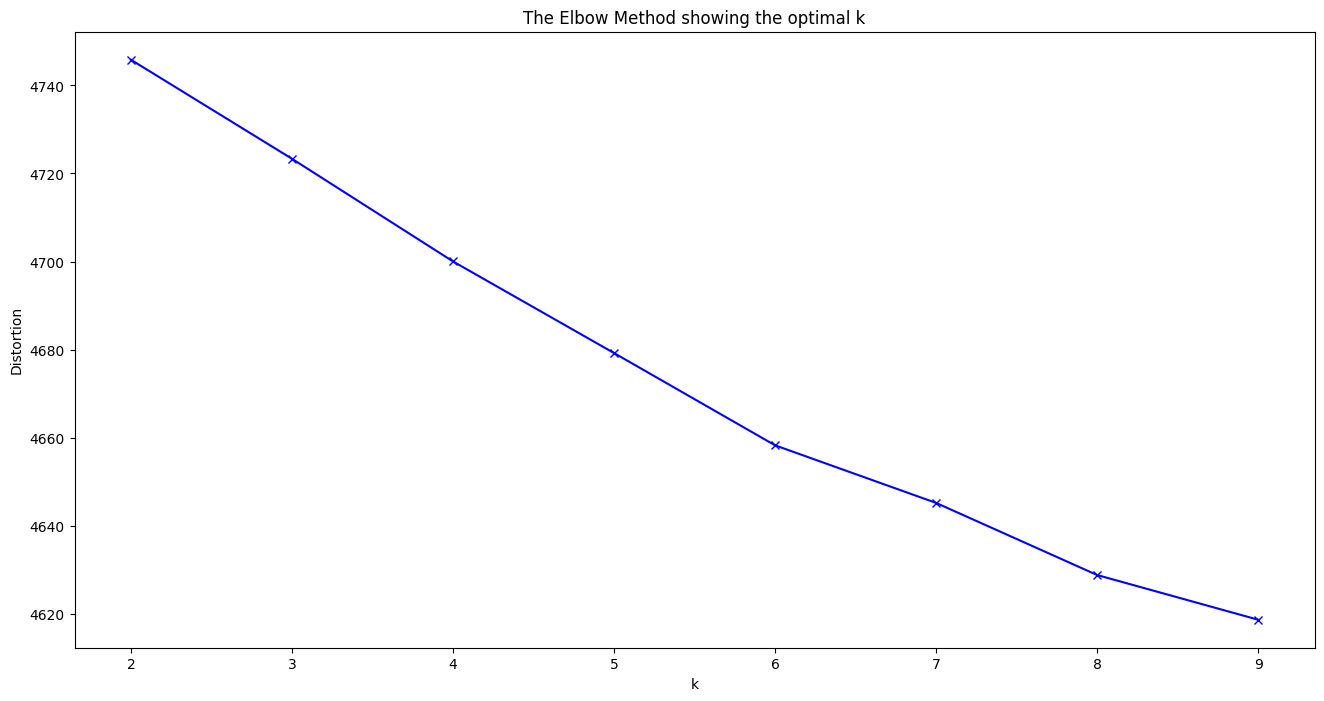

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

The plot above shows that the elbow is on k=6, which means that there are 6 cluster in this data. k=6 is choose beacuse it has the highest silhoutte score, indicating well-defined structure along with the elbow method.

In [ ]:
#Based on silhouette score and elbow method cluster 6 is the best one
kmeanModel = KMeans(n_clusters=6)
kmeanModel.fit(train_tfidf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6)

In [ ]:
train_tfidf['k_means']=kmeanModel.predict(train_tfidf)

# Testing data

In [ ]:
x_test=pd.DataFrame(x_test).reset_index()

In [ ]:
x_test

,index,Clean_Tweet
0,2794,tadi saya tlp cs mending kalo udh bisa tarik ...
1,2592,gimana mau sehat uang semuanya ada di rekenin...
2,5356,bsi bank sabar indonesia
3,2002,aku udah bisa narik alhamdulillah di atm tera...
4,4205,td sdh aku tarik lewat mandiri huhu
...,...,...
1216,2929,itu mutasinya april sebelum rame kasus ransom...
1217,734,udah hari layanan mobile banking belum dapat ...
1218,1971,itu kalau infrastruktur it nya udah bagus ini...
1219,1168,thanks infonya sungguh meresahkan bank satu ini


In [ ]:
Y = vectorizer.transform(x_test['Clean_Tweet'])
test_tfidf=pd.DataFrame(Y.toarray(),columns=vectorizer.get_feature_names_out())
test_tfidf.head()

,__,aaaa,aaaaahhh,aal,aamiin,abal,abang,abangnya,abc,abis,...,zpnvbfs,zstie,zuma,zvvcszdgi,zvvlfm,zweuqfhi,zynibtgw,zzaonfzkac,zzz,zzzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To make it easier to carry out persona analysis, the results will be transformed to its original form (back to text).

In [ ]:
x_test['k_means']=kmeanModel.predict(test_tfidf)

In [ ]:
x_test

,index,Clean_Tweet,k_means
0,2794,tadi saya tlp cs mending kalo udh bisa tarik ...,1
1,2592,gimana mau sehat uang semuanya ada di rekenin...,3
2,5356,bsi bank sabar indonesia,4
3,2002,aku udah bisa narik alhamdulillah di atm tera...,3
4,4205,td sdh aku tarik lewat mandiri huhu,1
...,...,...,...
1216,2929,itu mutasinya april sebelum rame kasus ransom...,1
1217,734,udah hari layanan mobile banking belum dapat ...,3
1218,1971,itu kalau infrastruktur it nya udah bagus ini...,1
1219,1168,thanks infonya sungguh meresahkan bank satu ini,1


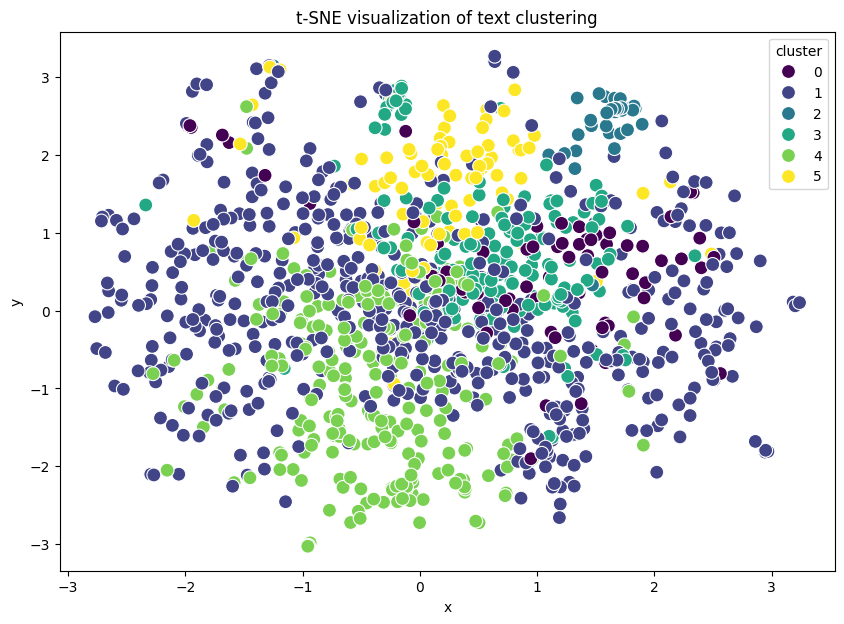

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(Y.toarray())

# Create a DataFrame with t-SNE results and cluster labels
tsne_df = pd.DataFrame(X_tsne, columns=['x', 'y'])
tsne_df['cluster'] = x_test['k_means']

# Plot the t-SNE results
plt.figure(figsize=(10, 7))
sns.scatterplot(data=tsne_df, x='x', y='y', hue='cluster', palette='viridis', s=100)
plt.title('t-SNE visualization of text clustering')
plt.show()

In the visualization above, we can see the text data formed into 6 groups. Although each data overlaps and mixes with each other, the resulting cluster prediction results are quite good. This can be seen from the division of the data where cluster 4 is mostly below while cluster 5 is generally above.


# Persona Analysis

In [ ]:
# Group by 'k_means' category
grouped_df = x_test.groupby('k_means')

# Initialize an empty list to store individual group DataFrames
group_frames = []

# Iterate through each group and append to the list
for group_name, group_data in grouped_df:
    group_frames.append(group_data)

# Concatenate all group DataFrames into a single DataFrame
combined_df = pd.concat(group_frames)

# Save the combined DataFrame to a CSV file
combined_df.to_csv('kmeans6.csv', index=False)

In [ ]:
# Group by 'k_means' category 0
print("Group 0:")
if 0 in grouped_df.groups:
    print(grouped_df.get_group(0))
print("\n")

Group 0:
      index                                        Clean_Tweet  k_means
6      5260   min minta tolong saya dibales dong saya mau a...        0
24     6045                  min sampai kapan kayak gini terus        0
47     3785  min klo atm timeout waktu narik terus uang gk ...        0
90      254                                        cek dm dong        0
91     4269         min kapan beres ni udh bisa tarik tunai ga        0
...     ...                                                ...      ...
1135   3915   min mobile bsi masih gak bisa ya mau cek sald...        0
1180   4010   ingfo min apakah bsi mobile emg lagi error ya...        0
1196   1310                                  kapan jadinya min        0
1202   5460                     mobile blm bs min smp kpn nih         0
1212    183            saya blm bisa tarik tunai dr hp nih min        0

[82 rows x 3 columns]




analysis: The text in cluster 0 is mostly a complaint that asks for a chat reply from the admin or is a question to the admin that requires a response from the admin. Therefore, if you want to create an automatic answer or complaint from cluster 0, the message that can be conveyed is "Thank you for reaching out. Your message will be followed up soon by one of our representatives. We appreciate your patience and will address your concerns as quickly as possible." In addition, the action that can be taken is to provide an admin to answer customer cluster 0.

In [ ]:
# Group by 'k_means' category 1
print("Group 1:")
if 1 in grouped_df.groups:
    print(grouped_df.get_group(1))
print("\n")

Group 1:
      index                                        Clean_Tweet  k_means
0      2794   tadi saya tlp cs mending kalo udh bisa tarik ...        1
4      4205                td sdh aku tarik lewat mandiri huhu        1
7       534   bisikin banknya btw emang pernah mau ngecilin...        1
14     1737   ini mau sampai kapan gangguan mempersulit ora...        1
18     5796  bank bsi system nya abal banget udah hari lo a...        1
...     ...                                                ...      ...
1215   4228     udah bisa nihh mbanking nya coba refresh duluu        1
1216   2929   itu mutasinya april sebelum rame kasus ransom...        1
1218   1971   itu kalau infrastruktur it nya udah bagus ini...        1
1219   1168   thanks infonya sungguh meresahkan bank satu ini         1
1220   5382   sesuai syariah segala sesuatunya dipertanggun...        1

[574 rows x 3 columns]




analysis: The text in cluster 1 is mostly complaints that discuss bank or system errors. The complaints are in the form of comments or tweets. Therefore, the automatic message that can be given is "We apologize for the inconvenience caused by the recent system issues. We are working diligently to resolve these errors as quickly as possible. Thank you for your patience and understanding.". So, there is no need for a special admin to serve chats/dm from users of this cluster.

In [ ]:
# Group by 'k_means' category 2
print("Group 2:")
if 2 in grouped_df.groups:
    print(grouped_df.get_group(2))
print("\n")

Group 2:
      index                                        Clean_Tweet  k_means
39     3250          udah bisa ka sementara ke atm aja dulu ka        2
66     4471   berangsur pulih tapi traffic masih tinggi aku...        2
70     4960   harusnya sudah mulai pulih ya ka meski belum ...        2
84      544          udah bisa ka sementara ke atm aja dulu ka        2
191    2414   kayaknya masih ada traffic tinggi coba k caba...        2
278     706   iya ka proses pemulihan kayanya ka jika urgen...        2
283    4655   sabar ka bsi mobilenya memang sebagian belum ...        2
331    2754   udh coba cek lagi ka sepertinya udh ada yg bi...        2
334    2802   coba ke atm ka semisal urgent topup atau apa ...        2
354    5118   sementara ke atm dulu keknya ka aku juga masi...        2
359    4246         hati hati akun palsu ini ka jangan di klik        2
378    1220   ka saranku tf pakai transfer online ka jgn bi...        2
400    1374   sabar ya ka lagi ada gangguan berangsur p

analysis: The text in cluster 2 is mostly complaints discussing the inability of customers to make transactions suspected of being caused by high application traffic. Then there are several messages in the discussion that urge users to use ATMs temporarily. Therefore, the automatic message that can be given is "Due to unusually high traffic on our application, some customers may experience difficulties in making transactions. We recommend using our ATM services for your transactions at this time. We apologize for any inconvenience this may cause and appreciate your understanding." So, no special admin is needed to serve chats/dm from users of this cluster.

In [ ]:
# Group by 'k_means' category 3
print("Group 3:")
if 3 in grouped_df.groups:
    print(grouped_df.get_group(3))
print("\n")

Group 3:
      index                                        Clean_Tweet  k_means
1      2592   gimana mau sehat uang semuanya ada di rekenin...        3
3      2002   aku udah bisa narik alhamdulillah di atm tera...        3
10      879   sy skrg di bsi fatmawati katanya system down ...        3
17     1354   coba tarik tunai di atm tadi pagi saya yari t...        3
25     5218   asli sih belum bisa topup udah hampir semingg...        3
...     ...                                                ...      ...
1155     71   kalo top up gopay udah bisa kok sama top up e...        3
1157    711                     mbanking nya masih ga bisa ya         3
1187   2439   halo admin utk layanan mobile banking masih b...        3
1213   5897   transfer ke lain bank kenapa belum bisa bsimo...        3
1217    734   udah hari layanan mobile banking belum dapat ...        3

[172 rows x 3 columns]




analysis: The text in cluster 3 is mostly complaints that discuss the inability of customers to transfer/top up/transact via the application. Similar to the previous cluster, it is necessary to provide an appeal to users to use ATMs temporarily. Therefore, the automatic message that can be given is "We apologize for the inconvenience, but our mobile banking services are currently unavailable. Please use our ATMs for your transactions in the meantime. We are working diligently to resolve the issue, and we recommend checking the app regularly for updates." Thank you for your patience and understanding. Beside, no special admin is needed to serve chats/dm from users of this cluster.

In [ ]:
# Group by 'k_means' category 4
print("Group 4:")
if 4 in grouped_df.groups:
    print(grouped_df.get_group(4))
print("\n")

Group 4:
      index                                        Clean_Tweet  k_means
2      5356                          bsi bank sabar indonesia         4
5       553  imbas dari peretasan yang menyebabkan error ny...        4
9      5636  i still have buckets on my first bank acc tp t...        4
11     3795   hai robbi sebelumnya kami turut bersimpati at...        4
12     2798                                  bsi itu bumn kan         4
...     ...                                                ...      ...
1203   5658   btw bsi itu bank syariah bukan bank konvensio...        4
1204   2833  bank baru udah kayak gini kacau gimana nanti k...        4
1210    776   lg error kyk gini emg agak ngeri tf gitu bang...        4
1211   5769   gmn tuh ya kak aku ada tadi pagi trf dari bsi...        4
1214   4162   sudah saya lakuin bank hahaha kami pindahkan ...        4

[269 rows x 3 columns]




analysis: The text in cluster 4 mostly contains user disappointment with the existing disruption. So many expressions of disappointment can be found in this cluster. For example, "it's useless, no one answers the phone." "terrible, terrible, terrible, what's wrong with this bank." So the customer services' response should acknowledge the users' frustration, offer apologies, and provide steps to resolve the issue or ways to contact support for further assistance.

In [ ]:
# Group by 'k_means' category 5
print("Group 5:")
if 5 in grouped_df.groups:
    print(grouped_df.get_group(5))
print("\n")

Group 5:
      index                                        Clean_Tweet  k_means
8      5265   ambil di mesin atm juga gak bisa kak kalo amb...        5
15      233                            sama kak saya juga gini        5
32     2154   tunggu aja dulu kak atau ke kc terdekat kalo ...        5
48     4217   awas akun penipu kak akun asli gak konsul via wa        5
51     5110          sama kak sy mau cek saldo aja gabisa bisa        5
...     ...                                                ...      ...
1154   1586                    tetep gabisa di kc terdekat kak        5
1158   3836                              sama kak sy jga huhu         5
1192   2570   kak uangmu skrng udh balik blm aku jga tf jt ...        5
1195   3116   sama kak saya juga barusan transaksi gagal ta...        5
1206   5458   sampe sekarang gak masuk kak ditungguinn aja ...        5

[86 rows x 3 columns]




analysis: The text in group 5 mostly contains customer disappointment over the existing service disruption. However, what is different from cluster 4 is that the previous cluster looks more like a complaint because there are also several users who curse the system. However, in this cluster, users look more desperate and frustrated (sad). Therefore, customers need a solution that can handle the feeling of disappointment. The response needs to acknowledges the customers' feelings, offers reassurance, and provides a way for them to seek immediate assistance if needed. "We deeply regret the frustration and disappointment caused by the current service disruption. We understand how this affects you and are working tirelessly to resolve the issue. In the meantime, please know that we are here to support you. If you need immediate assistance, feel free to contact our support team directly. Thank you for your patience and understanding during this challenging time."